# Coding Lab 2
## Packages, ndarrays, Plotting, and Numerical Integration
## Stellar Population Synthesis
### ASTR-4302, Prof. Faus
### **Due 2024 Sep 27, Start of Class**

Send to michael.fausnaugh@ttu.edu, with your name in the filename.

In this coding lab, we will learn about high-level data structures that are useful for scientific programming. We will also learn how to make plots and figures using Python.

We will use these coding tools to try to disentangle the contribution of several stellar populations from a galaxy spectrum.

**Full Effort:** To receive a check, you need to demonstrate full effort. You should run your code in every cell (`Shift+Enter`). If the code raises an error, you should try to debug it. 

If you try to debug things for 2 or 3 hours but can't get it to work, make a note of where you stopped with a comment or print function in the cell. Explain in one or two sentences what the error or problem that you are seeing is and what confusion(s) it is causing you.

If you don't give an explanation of why there are errors in your code cells or why you did not complete the notebook, you will receive a check-minus.

A check-plus is worth extra credit---one check-plus balances a check-minus. So a check-plus gives you an extra 1.5 percentage points on your final grade. If you want to aim for extra-credit, you have until Friday (Feb. 23) at 10am to work on the coding lab. It is worth saying that I will help you with the coding lab if you bring it to office hours or make an appointment.

### 1. Packages

A package is some set of useful code or software tools that someone has devleoped and made available. In python, there are a lot of freely-available packages. You can find a large list of packages on the Python Package Index, PyPI: https://pypi.org/. 

A Package is sometimes also called a "module" or a "library." Especially in other languages (like C), libraries are a common term.  In some cases, there are technical meanings; for example, a python package is usually made up of one or more modules. But the basic idea for all of these terms (package, module, or library) is that these are extensions to the core language that give you more tools.

Two very important packages for scientific computing in python are `numpy` and `matplotlib`. `numpy` is short for Numeric Python. `matplotlib` is a package that will plot data for you.

Both packages are very large, in terms of the number of tools and functions that are avaialbe. The packages also have a large userbase and developer base, and you can find a lot of documentation and help for using these pacakges. You should know about the websites, in case you need to find help or read the manuals:

https://numpy.org/

https://matplotlib.org/

It is worth saying that there are other packages out there that do similar things, if not the same things, as these two. But `numpy` and `matplotlib` are probably the most standard and well-known packages for scientific computing in python.

A great thing about python is that it is very easy to use packages. To access the tools, you use an `import` command, like this:


In [2]:
import numpy
import matplotlib
print("success, move to the next cell.")

success, move to the next cell.


This gives you access to all of the tools in numpy or matplotlib. You access them with a `.`, for example

In [3]:
x = [1,2,3]
y = [2,4,8]
dot_product = numpy.dot(x,y)
print(dot_product)

34


So, this function called `numpy.dot` calculated the dot product for 2 lists, x and y.  This function is part of the `numpy` package; in general, you need to know about/learn functions in numpy to make the best use of it.

We will do some practice with `matplotlib` a bit further down.

It is tedious to keep typing `numpy` or `matplotlib`. You can rename any package when you import it in python. In principle, you can name things whatever you want. People usually change `numpy` to `np`, with the following command:

In [4]:
import numpy as np

x = [1,2,3]
y = [2,4,8]
dot_product = np.dot(x,y)
print(dot_product)

34


The best thing to do is to import all of your tools at the very start of your program or notebook---we have already taken care of the imports for this notebook.

**Exercise:** In the cell below, use numpy to calculate the cross product of two lists. Is the result correct?

In [12]:
x = [1,2,3]
y = [2,4,8]

#calculate cross product here.



### 2. Data Structures and the ndarray

Most packages give you new functions and new data structures. We already encountered one kind of data structure, the list.  Remember, for example, that we can add objects to a list in the following way:

In [5]:
sample_list = [1,2.2, 3.3]
print('print statement 1:',sample_list)

for ii in range(5):
    sample_list.append(4.4 + ii*1.1)
print('print 2, after appending elements',sample_list)

print statement 1: [1, 2.2, 3.3]
print 2, after appending elements [1, 2.2, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8]


A list can do other things as well:

In [8]:
#add an element to the middle of a list

#first argument of `insert` is the index number, second element is the thing you want to insert
sample_list.insert(2, 9.9)

#here, you will see that `9.9` has been put in the 3rd place in the list
print('Contents of sample list after inserting 9.9 in the 3rd index:')
print(sample_list)

#sort the list
#there is a function called sort, you call it with no arguments and it will sort your data structure
sample_list.sort()
print('Contents of sample list after sorting:')
print(sample_list)

Contents of sample list after inserting 9.9 in the 3rd index:
[1, 2.2, 9.9, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8, 9.9]
Contents of sample list after sorting:
[1, 2.2, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8, 9.9, 9.9]


In some ways, what makes a list a data structure is that (a) it serves as a container for the data, and (b) gives you functions to do things with the data.

Two shortcomings of lists are (1) math and function operations are hard, because you have to look up the elements of the list with the index; so usually you do operations on lists in a loop. (2) Looping over a list in python is not very efficient; it can be slow to do a loop over millions of elements in a list.

In [9]:
#If I want to add 100 to every element in the list, I have to do this:
for ii in range(len(sample_list)):
    sample_list[ii] = sample_list[ii] + 100
print(sample_list)


#but this code will cause a TypeError
sample_list + 100


[101, 102.2, 103.3, 104.4, 105.5, 106.6, 107.7, 108.8, 109.9, 109.9]


TypeError: can only concatenate list (not "int") to list

However, `numpy` has a special data structure called the `ndarray`, which fixes both of these problems. `ndarrays` make math very easy for a collection of data elements. `ndarray` objects are also super efficient, and can do lots of operations across the array quickly. (Under the hood, a lot of `numpy` is written in C, which runs very quickly on loops.)

In [10]:
#We can build an ndarray in different ways. For example, we can convert a list to an ndarray
print(type(sample_list))
sample_array = np.array(sample_list)
print(type(sample_array))
print(sample_array)
print(sample_array + 100)

<class 'list'>
<class 'numpy.ndarray'>
[101.  102.2 103.3 104.4 105.5 106.6 107.7 108.8 109.9 109.9]
[201.  202.2 203.3 204.4 205.5 206.6 207.7 208.8 209.9 209.9]


`ndarrays` get even better. If you want to do operations on ndarrays of the same size, `numpy` matches elements, one at a time.  This is called "vectorization." It makes our code much easier ot read, because we don't need to loop over the data structs. We can also assign a variable name to an ndarray and use it in an equation.

In [ ]:
#in the last coding lab, we caulculated the area of an ellipse like this.
major_axis = [1.1, 2.2, 3.3, 4.4 ]
minor_axis = [0.1, 0.2, 0.3, 0.4 ]
#BTW, numpy has some built in constants, like pi
#so we don't need to define it for ourselves
#pi = 3.14159
print(np.pi)

for ii in range(len( major_axis)):
    major_axis_use = major_axis[ii]
    minor_axis_use = minor_axis[ii]
    area_of_ellipse = np.pi*major_axis_use*minor_axis_use
    
    print('area of ellipse ', ii,':  ', area_of_ellipse)


#Notice how much easier it is with ndarrays 
major_axis = np.array([1.1, 2.2, 3.3, 4.4 ])
minor_axis = np.array([0.1, 0.2, 0.3, 0.4 ])
areas = np.pi*major_axis*minor_axis
print(areas)

#The ndarrays also do the arithmetic faster than the lists. 
#We might notice this if we tried to do operations on a lists with a million elements or so

**Exercise:** In the cell below, calculate the squares for all numbers in the given ndarray

In [11]:
x = np.array([0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

#calcualte the squares of all elements in x here:



By default, you should usually plan to use ndarrays in `numpy`. When doing data science with python or scientific computing, ndarrays are one of the best options. (I would argue they are the best overall, but that is an opinion.)

Here are some other important and useful numpy functions.  See also the `numpy` tutorial for beginners (https://numpy.org/doc/stable/user/absolute_beginners.html) and `numpy` fundamentals (https://numpy.org/doc/stable/user/basics.html).

In [13]:
#ways to make an ndarray:

#make a new array. The two arguments set the begining and end
new_array1 = np.arange(1,11)
print('new_array1:',new_array1)

#the third argument sets the spacing
new_array2 = np.arange(1,11, 0.2)
print('new_array2:',new_array2)

#if you don't know the spacing but know the number of elements that you want
#use np.linspace
#in this case, we make it with 30 elements, evenly spaced
new_array3 = np.linspace(1,11,30)
print('lenght of new_array3:',len(new_array3))
print('new_array3:',new_array3)


#make a new array that is all ones or zeros
#the argument gives the size of the array you need)
array_of_zeros = np.zeros(10)
print('array_of_zeros:',array_of_zeros)

array_of_ones = np.ones(15)
print('array_of_ones',array_of_ones)



new_array1: [ 1  2  3  4  5  6  7  8  9 10]
new_array2: [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8]
lenght of new_array3: 30
new_array3: [ 1.          1.34482759  1.68965517  2.03448276  2.37931034  2.72413793
  3.06896552  3.4137931   3.75862069  4.10344828  4.44827586  4.79310345
  5.13793103  5.48275862  5.82758621  6.17241379  6.51724138  6.86206897
  7.20689655  7.55172414  7.89655172  8.24137931  8.5862069   8.93103448
  9.27586207  9.62068966  9.96551724 10.31034483 10.65517241 11.        ]
array_of_zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
array_of_ones [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Exercise**: In the cell below, make an array of 10 numbers evenly spaced between 10 and 1000. Then make a second array of 10 numbers logarithmically spaced between 10 and 1000.

In [ ]:
#make arrays here.



Here are examples of mathematical functions used with `numpy`:

In [14]:
#numpy functions to act on ndarrays
#really easy to do a lot of math
x = np.arange(1,11)
print('log_10 of x', np.log10(x))
print('log of x',    np.log(x))
print('sqrt(x)',     np.sqrt(x))
print('x^2', np.power(x,2))
print('e^x', np.exp(x))


log_10 of x [0.         0.30103    0.47712125 0.60205999 0.69897    0.77815125
 0.84509804 0.90308999 0.95424251 1.        ]
log of x [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]
sqrt(x) [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
x^2 [  1   4   9  16  25  36  49  64  81 100]
e^x [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


### 3. Plotting

The package for plotting is `matplotlib`. Plotting is quite complicated, because you need some software that controls what pixel data the computer knows about, some software that knows how to draw x-y values in terms of pixels, some other software that translate x-y and pixels for the computer, and yet more software that controls how the computer tells the display device (your screen or monitor) to draw the data. 

In many cases, the scientist doesn't care at all about these things, so a popular model is to separate software tools that the user will use from all of the backend stuff that lets the computer draw graphics. Matplotlib works in this way:

In [15]:
#import matplotlib tools---this does all the graphics and translations for graphics
import matplotlib

#set default size of the figures
matplotlib.rcParams['figure.figsize'] = (4,4)

#this line tells python to draw the plots inside of this jupyter notebook. 
#So when you plot something, it displays below the code cell
%matplotlib inline


#all of the user tools are in a module (library) called matplotlib.pyplot. 
#It is customary to call this set of tools `plot`
import matplotlib.pyplot as plt
print('success, continue to next cell')

success, continue to next cell


The key function in `pyplot` is called `plot` (invoked with `plt.plot`). This function takes as the first argument the x-values (in a list or ndarray) and as the second argument the y-values.

There are also **keywords** in the plot function, which are variables that are set when a function is called.

In `pyplot`, you can change the way the plot looks using the keywords.

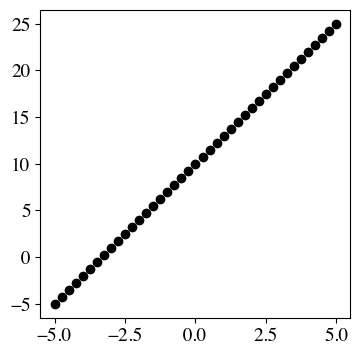

In [16]:
#plot a straight line, with slope of 3 and y-intercept of 10
x = np.arange(-5,5.25,0.25)
y = 3*x + 10

#black circles with no connections
plt.plot(x,y,color='black', marker='o', linestyle="None")

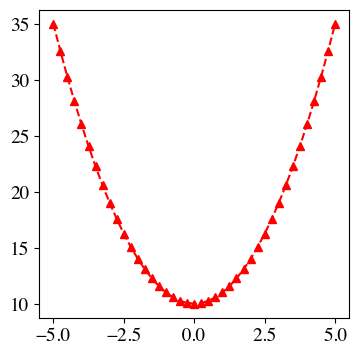

In [17]:
#plot a parabola with y-intercept of 10
x = np.arange(-5,5.25,0.25)
y = x**2 + 10

#red stars with dashed line connection
plt.plot(x,y,color='red', marker='^', linestyle="--")

You can plot several lines in the same figure.  

There are also functions to change the x and y axis, and add labels.

You can also make a legend.

Here are examples of all three:

Text(0.5, 0, 'x-coordinate')

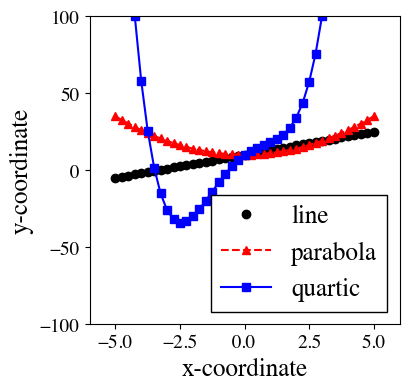

In [18]:
x = np.arange(-5,5.25,0.25)

line = 3*x + 10
parabola = x**2 + 10
quartic = x**4 + x**3 - 6*x**2 +  12*x + 10

#We add the "label" keyword, as the string that will
#appear in the legend
plt.plot(x, line, color='black', marker='o',linestyle="None", label="line")

plt.plot(x, parabola, color='red', marker='^', linestyle="--", label="parabola")

#the 's' is for square
plt.plot(x, quartic, color='blue', marker='s', linestyle="-", label="quartic")

#loc means "location"
plt.legend(loc="lower right")

#ylimit and xlimit of the axes
plt.ylim([-100,100])
plt.xlim([-6,6])

#x and y labels of the axes
plt.ylabel('y-coordinate')
plt.xlabel('x-coordinate')

**Exercise:** In the cell below, make an array with 100 elements evenly spaced between 0 and 1.  Call this array `x`.  Then plot the following functions, all in one figure:
$$
y = x\\
y = x^2\\
y = \sqrt{x}\\
y = \sin(2\pi x)
$$

In [19]:
#make your array and plot the functions here:



### 4. Stellar Population Synthesis

In this coding lab, we will try to interpret galaxy spectra that contain a mixture of stellar populations. For simplicity, these will be stellar populations of the same chemical composition but different ages.


The first thing we do is pull the data to our working cloud directory. Run the code cell below and to see the galaxy spectra that we will be trying to interpret.

Text(0, 0.5, 'Flux (arbitrary)')

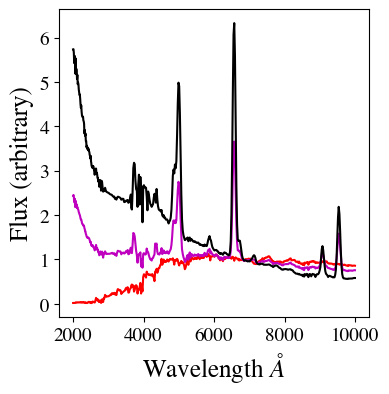

In [27]:
import os
if os.path.isfile('problem1.txt'):
    pass
else:
    !wget https://raw.githubusercontent.com/mmfausnaugh/astr4302-coding-lab-2/refs/heads/main/problem1.txt
if os.path.isfile('problem2.txt'):
    pass
else:
    !wget https://raw.githubusercontent.com/mmfausnaugh/astr4302-coding-lab-2/refs/heads/main/problem2.txt
if os.path.isfile('problem1.txt'):
    pass
else:
    !wget https://raw.githubusercontent.com/mmfausnaugh/astr4302-coding-lab-2/refs/heads/main/problem3.txt
        
galaxy1_wavelength,galaxy1_flux = np.genfromtxt('problem1.txt',unpack=1)
galaxy2_wavelength,galaxy2_flux = np.genfromtxt('problem2.txt',unpack=1)
galaxy3_wavelength,galaxy3_flux = np.genfromtxt('problem3.txt',unpack=1)

plt.plot(galaxy1_wavelength, galaxy1_flux, 'r')
plt.plot(galaxy2_wavelength, galaxy2_flux, 'm')
plt.plot(galaxy3_wavelength, galaxy3_flux, 'k')

plt.xlabel("Wavelength $\AA$")
plt.ylabel("Flux (arbitrary)")

So, this code pulled 3 files from the internet, and plotted their contents. (You can always click on the files that it downloaded in the navigation bar to see what data is inside the files.)

We have three very different galaxy spectra---the difference is due to the kind of stars that are present.

What we will do is compare the galaxy light to models of stellar populations. Our model of the populations will be a mixture of single stellar populations---the reason for this is that we understand single stellar populations reasonably well from studies of star clusters and the theory of stellar evolution.

The spectrum from our galaxy will be
$$
S(\lambda)_{\rm galaxy} = \sum_i w_i S_i(\lambda)_{\rm SSP}.
$$

Here, $S$ is a spectrum, which is a function of wavelength $\lambda$. The galaxy spectrum $S_{\rm galaxy}$ is a sum of single stellar populations (SSPs), each which has a relative weight $w$. 

To keep things simple, we will try a model with 4 SSPs. Your task will be to determine what $w$ you need for each SSP to reproduce the galaxy spectrum.

Let's load up the SSP models:


In [37]:
import subprocess
urlstem = 'https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/stellar_pop/'
fstem   = 'ssp_logage{:4.2f}_zhp0.00.fits'
for age in [6.0, 8.5,9.25,10]:
    file_use = fstem.format(age)
    if os.path.isfile(file_use):
        pass
    else:
        print(urlstem+file_use)
        subprocess.run(['wget', urlstem + file_use])

from astropy.io import fits
def read_ssp_template(infile):
    d = fits.open(infile)
    wavelength = d[1].data['WAVELENGTH']
    flux = d[1].data['FLUX']
    
    m = d[1].data['WAVELENGTH'] == 7050
    flux = flux/flux[m]
    
    m2 = (wavelength > 2000) & (wavelength < 1.e4)
    wavelength = wavelength[m2]
    flux = flux[m2]
    
    return wavelength, flux
    

ssp_1e6_years_wavelength, ssp_1e6_years_flux = read_ssp_template('ssp_logage6.00_zhp0.00.fits')   
ssp_3e8_years_wavelength, ssp_3e8_years_flux = read_ssp_template('ssp_logage8.50_zhp0.00.fits')   
ssp_2e9_years_wavelength, ssp_2e9_years_flux = read_ssp_template('ssp_logage9.25_zhp0.00.fits')   
ssp_1e10_years_wavelength, ssp_1e10_years_flux = read_ssp_template('ssp_logage10.00_zhp0.00.fits')   
wavelengths = ssp_1e6_years_wavelength

The code above downloaded models of SSPs of different ages. In particular, it grabbed a $10^6$\ year-old SSP, a $3\times 10^8$\ year-old SSP, a $2\times 10^9$\ year-old SSP, and a $10^10$\ year-old SSP.  It then loaded the data into ndarrays, called `ssp_1e6_years_<xx>` for the $10^6$\ year-old SSP, etc.  The `<xx>` is either wavelength or flux, which gives the x-data (wavlength, $\lambda$) or y-data (flux, $S(\lambda)$) respectively.

You will use these arrays in the following questions. For convienence, their names are

```
ssp_1e6_years_wavelength, ssp_1e6_years_flux 
ssp_3e8_years_wavelength, ssp_3e8_years_flux 
ssp_2e9_years_wavelength, ssp_2e9_years_flux 
ssp_1e10_years_wavelength, ssp_1e10_years_flux 

```

### 5. Questions

1)Plot each SSP in the cell block below. You may use one plot or several plots.  

In [35]:
#plot the SSP models here.  For example, use ssp_1e6_years_wavelength for the x-axis data and ssp_1e6_years_flux for the y-axis data. Remember that you must plot all 4 models

2) In two or 3 sentence, describe what you see about the models.  Which model is bluest? Which model is reddest? What distinctive features do you see for each model?

In [ ]:
#give your answer in this cell. Use either comments or print functions.

3) In the following cell block, adjust the weights of each SSP until you reproduce the spectrum for galaxy 1. A few tips:
- The weights are relative, and so should range between 0 and 1.
- The sum of the weights should equal one.
- Try different weights in increments of 0.1 before trying any finer differences.  For example, you will not need a number like 0.87---that will be 0.9 instead. Similarly, 0.45 will either be 0.4 or 0.5.
- You may set some weights to 0.
- All of the wavelength ndarrays are identical, and you can reference them with the variable `wavelengths`.

In [41]:
plt.plot(galaxy1_wavelength, galaxy1_flux, 'r')

w1 = 
w2 = 
w3 = 
w4 = 

model_flux = w1*ssp_1e6_years_flux + \
             w2*ssp_3e8_years_flux + \
             w3*ssp_2e9_years_flux + \
             w4*ssp_1e10_years_flux

plt.plot(wavelengths, model_flux)


SyntaxError: invalid syntax (233799383.py, line 3)

4) Repeat question 4 but for galaxy 2. In this case, write or copy the code that calcualtes the galaxy model flux.

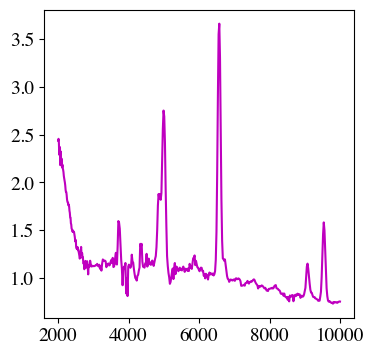

In [42]:
plt.plot(galaxy2_wavelength, galaxy2_flux, 'm')

#calculate the model galaxy flux here, and plot it to compare with galaxy 2.

5) Repeat question 4 but for galaxy 3. 

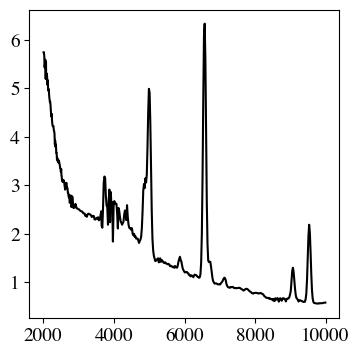

In [44]:
plt.plot(galaxy3_wavelength, galaxy3_flux, 'k')

#calculate the model galaxy flux here, and plot it to compare with galaxy 2.

6) In the cell below, list the ages of the SSPs for each galaxy. Be sure to include units.

In [ ]:
print('Galaxy 1 consists of SSPs of ages:')
print('Galaxy 2 consists of SSPs of ages:')
print('Galaxy 3 consists of SSPs of ages:')